In [33]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [63]:
start_date = '2012-02-19'
end_date = '2022-02-19'

In [64]:
df = yf.download("TSLA", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [65]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-02-21,6.974,6.974,6.762,6.900,6.900,5679000
2012-02-22,6.900,6.944,6.500,6.844,6.844,8273000
2012-02-23,6.798,6.994,6.712,6.906,6.906,4102000
2012-02-24,6.846,6.904,6.654,6.750,6.750,4799500
2012-02-27,6.682,6.800,6.600,6.724,6.724,3030000


In [28]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,154.198095,157.526615,150.588576,154.212071,154.212071,3.537540e+07
std,256.052786,261.787418,249.624440,255.937480,255.937480,2.814797e+07
min,5.368000,5.370000,5.104000,5.220000,5.220000,1.824500e+06
25%,39.898001,40.646500,39.168500,39.936999,39.936999,1.837350e+07
50%,50.381001,51.007000,49.647999,50.327000,50.327000,2.820860e+07
75%,70.627499,71.519497,69.428999,70.505001,70.505001,4.297200e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


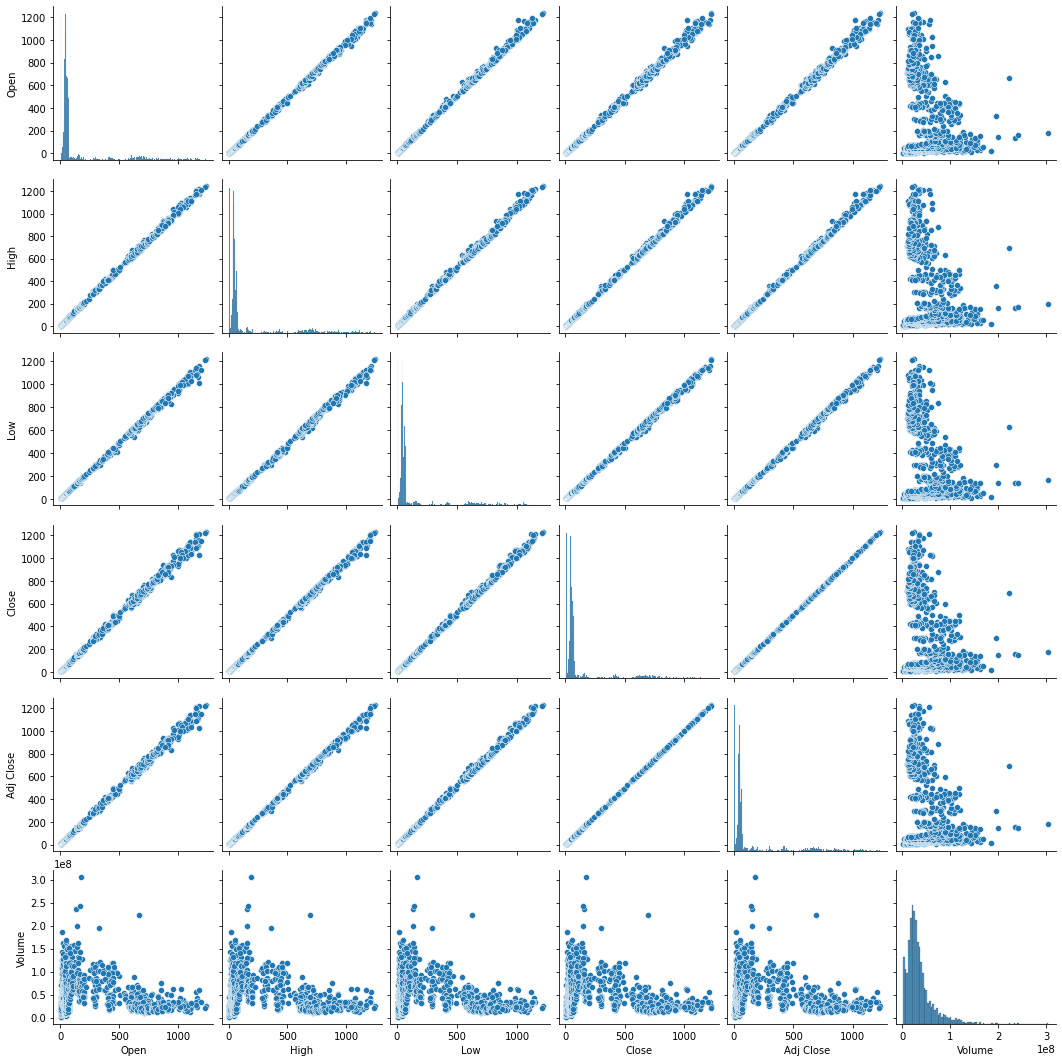

In [29]:
sns.pairplot(df)

In [10]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [53]:
def plot_boxs(dataframe):
    rows = len(dataframe.columns)
    plt.figure(figsize=(14,rows*5))
    i=1
    for column in dataframe.columns:
        sns.boxplot(dataframe[column], ax=plt.subplot(rows,3,i))
        i +=1

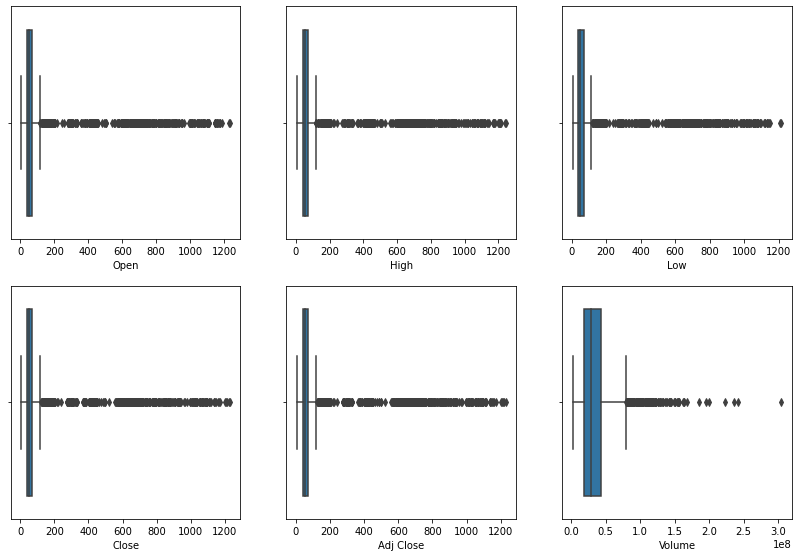

In [54]:
plot_boxs(df)

In [55]:
sd_scaler = StandardScaler()
df_scaled_sd = pd.DataFrame(sd_scaler.fit_transform(df), columns=df.columns)

In [56]:
df_scaled_sd.head()

,Open,High,Low,Close,Adj Close,Volume
0,-0.575090,-0.575209,-0.576286,-0.575693,-0.575693,-1.055220
1,-0.575379,-0.575324,-0.577336,-0.575912,-0.575912,-0.963046
2,-0.575777,-0.575133,-0.576487,-0.575669,-0.575669,-1.111256
3,-0.575590,-0.575477,-0.576719,-0.576279,-0.576279,-1.086472
4,-0.576230,-0.575874,-0.576935,-0.576380,-0.576380,-1.149348


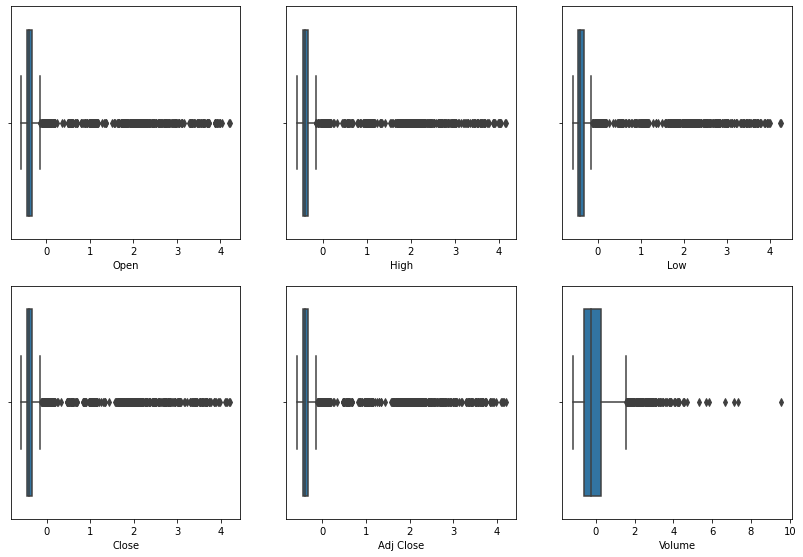

In [52]:
plot_boxs(df_scaled_sd)

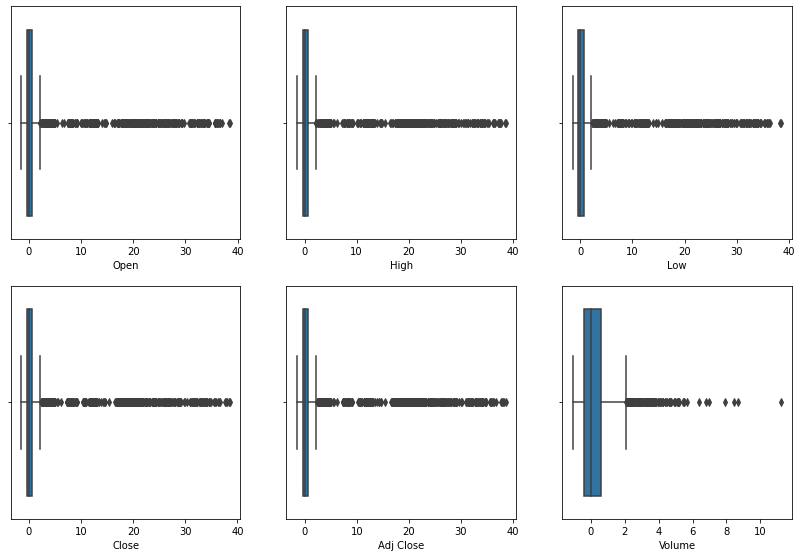

In [57]:
rb_scaler = RobustScaler()
df_scaled_rb = pd.DataFrame(rb_scaler.fit_transform(df), columns=df.columns)
plot_boxs(df_scaled_rb)

In [62]:
df[df.index=="2021-09-06"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [75]:
np.array(pd.bdate_range(start = start_date, end = end_date ).difference(df.index))

array(['2012-02-20T00:00:00.000000000', '2012-04-06T00:00:00.000000000',
       '2012-05-28T00:00:00.000000000', '2012-07-04T00:00:00.000000000',
       '2012-09-03T00:00:00.000000000', '2012-10-29T00:00:00.000000000',
       '2012-10-30T00:00:00.000000000', '2012-11-22T00:00:00.000000000',
       '2012-12-25T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-01-21T00:00:00.000000000', '2013-02-18T00:00:00.000000000',
       '2013-03-29T00:00:00.000000000', '2013-05-27T00:00:00.000000000',
       '2013-07-04T00:00:00.000000000', '2013-09-02T00:00:00.000000000',
       '2013-11-28T00:00:00.000000000', '2013-12-25T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-01-20T00:00:00.000000000',
       '2014-02-17T00:00:00.000000000', '2014-04-18T00:00:00.000000000',
       '2014-05-26T00:00:00.000000000', '2014-07-04T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-11-27T00:00:00.000000000',
       '2014-12-25T00:00:00.000000000', '2015-01-01

In [91]:
df.index[df.shape[0]-1]

Timestamp('2022-02-18 00:00:00')

In [92]:
def get_missing_dates(dataframe):
    start_date = df.index[0]
    end_date = df.index[df.shape[0]-1]
    return np.array(pd.bdate_range(start = start_date, end = end_date ).difference(df.index))    

In [93]:
get_missing_dates(df)

array(['2012-04-06T00:00:00.000000000', '2012-05-28T00:00:00.000000000',
       '2012-07-04T00:00:00.000000000', '2012-09-03T00:00:00.000000000',
       '2012-10-29T00:00:00.000000000', '2012-10-30T00:00:00.000000000',
       '2012-11-22T00:00:00.000000000', '2012-12-25T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-01-21T00:00:00.000000000',
       '2013-02-18T00:00:00.000000000', '2013-03-29T00:00:00.000000000',
       '2013-05-27T00:00:00.000000000', '2013-07-04T00:00:00.000000000',
       '2013-09-02T00:00:00.000000000', '2013-11-28T00:00:00.000000000',
       '2013-12-25T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2014-01-20T00:00:00.000000000', '2014-02-17T00:00:00.000000000',
       '2014-04-18T00:00:00.000000000', '2014-05-26T00:00:00.000000000',
       '2014-07-04T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-11-27T00:00:00.000000000', '2014-12-25T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-01-19